In this project I will be creating a model through deep learning concepts. 
The model will be a fault-detection of various components present in the Power lines transmission tower in various parts.
Dataset used: "InsPLAD: A Dataset and Benchmark for Power Line Asset Inspection in UAV Images" 
dataset link(https://github.com/andreluizbvs/InsPLAD)

I will be using a supervised learning process using the dataset:
**It is divided into 11 classes as:
'glass_Insulators_good',
'glass_insulators_missing_cap',
'lightning_rod_suspension_good',
'lightning_rod_suspension_rust',
'polymer_insulator_upper_shackle_corroded',
'polymer_insulator_upper_shackle_normal',
'vari_grip_bird_nest',
'vari_grip_good',
'vari_grip_rust',
'yoke_suspension_good',
'yoke_suspension_rust'



In [1]:
#Importing the basic libraries required as of now
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2

2025-06-02 13:40:33.581269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748871633.813770      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748871633.881982      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#features of the data 
IMG_SIZE = 640
BATCH_SIZE = 8 
NUM_CLASSES = 11  #InsPLAD has 11 classes in the dataset 

In [3]:
pwd

'/kaggle/working'

Loading the train dataset and validation dataset from the dataset directory

In [4]:
#Loading the train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/insplad/Train_data/train',
    labels = 'inferred',
    label_mode = "categorical",
    class_names = None,
    batch_size = 8,
    image_size = (IMG_SIZE,IMG_SIZE),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
    data_format = None,
    verbose=True,
    
)

Found 5108 files belonging to 11 classes.


I0000 00:00:1748871713.519858      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748871713.520636      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [5]:
#checking the class names
class_names = train_ds.class_names
class_names

['glass_Insulators_good',
 'glass_insulators_missing_cap',
 'lightning_rod_suspension_good',
 'lightning_rod_suspension_rust',
 'polymer_insulator_upper_shackle_corroded',
 'polymer_insulator_upper_shackle_normal',
 'vari_grip_bird_nest',
 'vari_grip_good',
 'vari_grip_rust',
 'yoke_suspension_good',
 'yoke_suspension_rust']

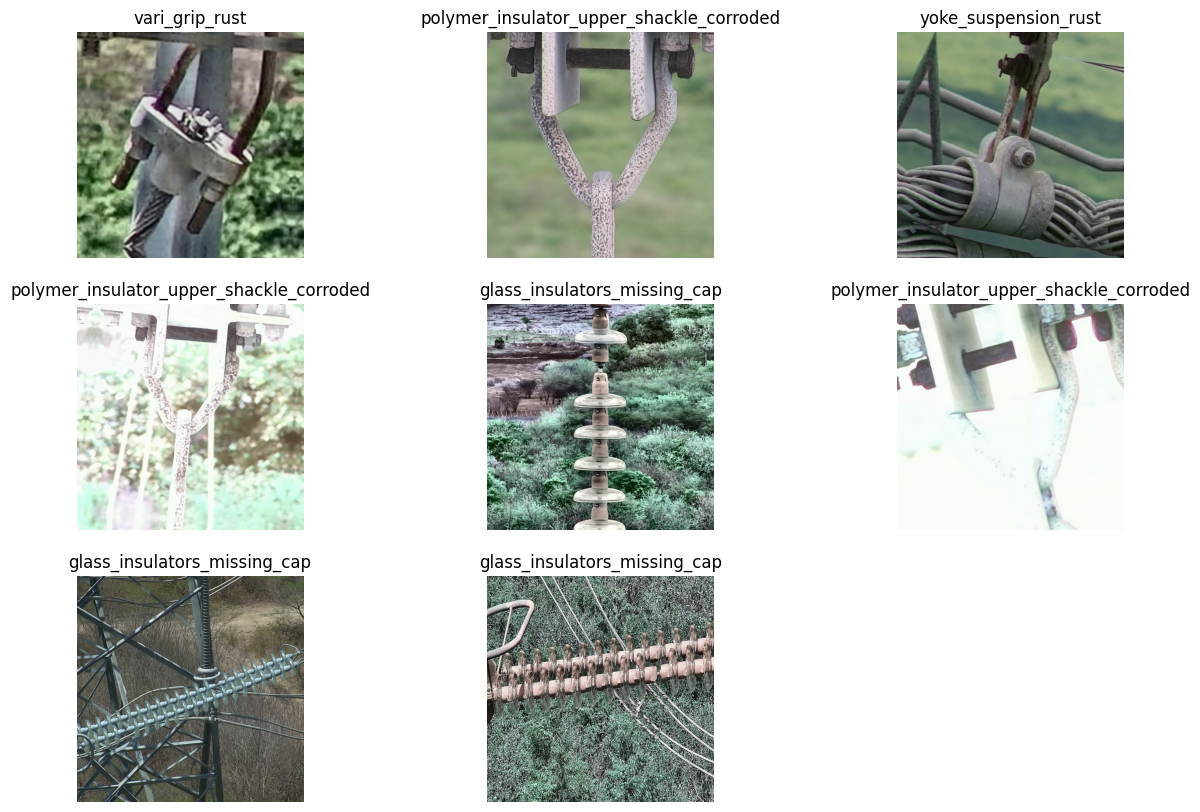

In [6]:
#Viewing the first batch of data 
class_names = train_ds.class_names
import numpy as np 
import matplotlib.pyplot as plt

for images,labels in train_ds.take(1):#will take 1 batch size of images
    plt.figure(figsize=(15,10))
    for i in range (images.shape[0]):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = np.argmax(labels[i])
        plt.title(f"{class_names[label_index]}")
        plt.axis("off")
    plt.show()


In [7]:
#setting a validation set as well
#hence loading the validation data present in the directory
validation_ds = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/insplad/Train_data/val',
    labels = 'inferred',
    label_mode = "categorical",
    class_names = None,
    batch_size = 8,
    image_size = (IMG_SIZE,IMG_SIZE),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
    data_format = None,
    verbose=True,
    
)

Found 6417 files belonging to 11 classes.


In [8]:
#viewing the shape of the data loaded and also the tensor matrix created
for x,y in train_ds:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[126.       151.       112.      ]
   [126.885155 151.88516  112.885155]
   [127.80859  152.8086   113.80859 ]
   ...
   [ 86.95703  131.95703   90.95703 ]
   [ 91.34442  136.34442   95.34442 ]
   [ 94.       139.        98.      ]]

  [[126.       151.       112.      ]
   [126.885155 151.88516  112.885155]
   [127.80859  152.8086   113.80859 ]
   ...
   [ 87.50334  132.50334   91.50334 ]
   [ 90.45927  135.45926   94.45927 ]
   [ 93.114845 138.11484   97.114845]]

  [[126.80859  151.8086   112.      ]
   [126.97802  151.97801  112.169426]
   [127.80859  152.8086   113.      ]
   ...
   [ 87.57422  132.57422   91.57422 ]
   [ 90.15876  135.15875   94.15876 ]
   [ 91.38281  136.38281   95.38281 ]]

  ...

  [[150.38281  169.38281  150.38281 ]
   [151.09856  170.09856  151.09856 ]
   [151.34618  169.53758  152.96336 ]
   ...
   [110.52492  110.52492  120.52492 ]
   [117.71753  117.37311  127.487915]
   [128.33984  125.33984  136.33984 ]]

  [[152.1148   171.       152.3444

BUILDING THE MODEL 

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,Input,Dropout,MaxPool2D,Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
#Input Layer
model.add(Input(shape=(IMG_SIZE, IMG_SIZE, 3))) 
#Convolution Layer And Max Pooling Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

In [12]:
#Flattening the layer
model.add(Flatten())
#Adding a dense hidden layer
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='sigmoid')) # 4 extra for bbox coordinates

In [13]:
#Compiling the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 638, 638, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 319, 319, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 317, 317, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 158, 158, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1597696)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     409,010,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,032,651 (1.52 GB)

 Trainable params: 409,032,651 (1.52 GB)

 Non-trainable params: 0 (0.00 B)

In [15]:
train_history = model.fit(x=train_ds,epochs=10)

Epoch 1/10


I0000 00:00:1748871732.257357     102 service.cc:148] XLA service 0x7adc58005320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748871732.258585     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748871732.258606     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748871732.579553     102 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1748871741.928321     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


639/639 ━━━━━━━━━━━━━━━━━━━━ 130s 183ms/step - accuracy: 0.1376 - loss: 477.4518
Epoch 2/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 115s 180ms/step - accuracy: 0.1410 - loss: 2.5961
Epoch 3/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 114s 179ms/step - accuracy: 0.1424 - loss: 2.3828
Epoch 4/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 115s 179ms/step - accuracy: 0.1421 - loss: 2.3767
Epoch 5/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 115s 179ms/step - accuracy: 0.1408 - loss: 2.3715
Epoch 6/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 115s 179ms/step - accuracy: 0.1404 - loss: 2.3664
Epoch 7/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 115s 180ms/step - accuracy: 0.1412 - loss: 2.3632
Epoch 8/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 114s 179ms/step - accuracy: 0.1404 - loss: 2.3582
Epoch 9/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 114s 179ms/step - accuracy: 0.1403 - loss: 2.3550
Epoch 10/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 114s 179ms/step - accuracy: 0.1414 - loss: 2.3513


In [16]:
import matplotlib.pyplot as plt

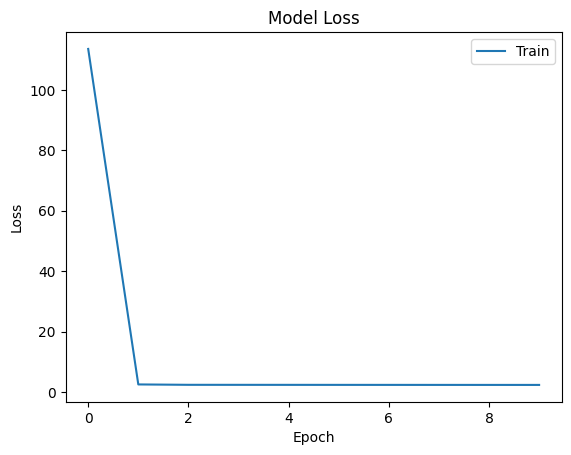

In [17]:

plt.plot(train_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


The provided loss curve shows:

i)Very high initial loss (~90+)

ii)Loss drops to near zero after just one epoch and remains flat

Interpretation and Detailed Evaluation
1)Overparameterized
The model is massively overparameterized for most practical image classification tasks.

2)Overfittting
The graph can also show that the model is having an oerfitting issue


Recreating the model to deal with the issues 

In [12]:
model = Sequential()

In [21]:
#Input Layer
model.add(Input(shape=(IMG_SIZE, IMG_SIZE, 3))) 
#Convolution Layer And Max Pooling Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
#adding a Global average pooling
model.add(GlobalAveragePooling2D())
#Adding the dense hidden layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))


In [23]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 638, 638, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 319, 319, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 317, 317, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 158, 158, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 156, 156, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 78, 78, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,179 (434.29 KB)

 Trainable params: 111,179 (434.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Fitting the model with validation data
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20
)

Epoch 1/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 108s 159ms/step - accuracy: 0.1740 - loss: 6.4003 - val_accuracy: 0.0073 - val_loss: 2.4956
Epoch 2/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 134ms/step - accuracy: 0.2402 - loss: 2.1635 - val_accuracy: 0.0087 - val_loss: 2.5289
Epoch 3/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 135ms/step - accuracy: 0.2531 - loss: 2.1314 - val_accuracy: 0.0118 - val_loss: 2.5982
Epoch 4/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 134ms/step - accuracy: 0.2876 - loss: 2.0398 - val_accuracy: 0.0106 - val_loss: 2.7378
Epoch 5/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 135ms/step - accuracy: 0.2961 - loss: 1.9839 - val_accuracy: 0.0340 - val_loss: 2.7492
Epoch 6/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 135ms/step - accuracy: 0.3186 - loss: 1.9108 - val_accuracy: 0.0175 - val_loss: 2.5023
Epoch 7/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 85s 134ms/step - accuracy: 0.3624 - loss: 1.8566 - val_accuracy: 0.0485 - val_loss: 2.5873
Epoch 8/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 134ms/step - accuracy: 0.3905 - loss: 

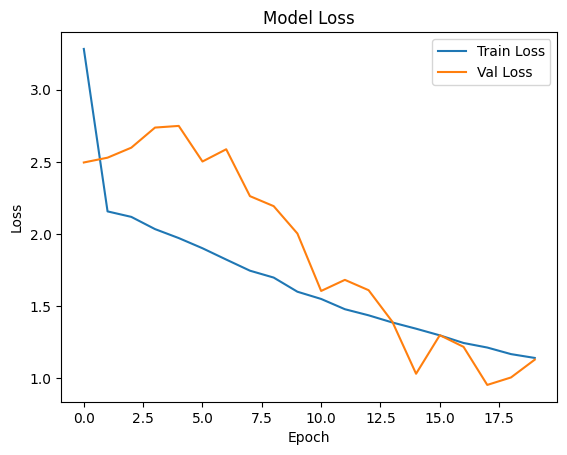

In [27]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

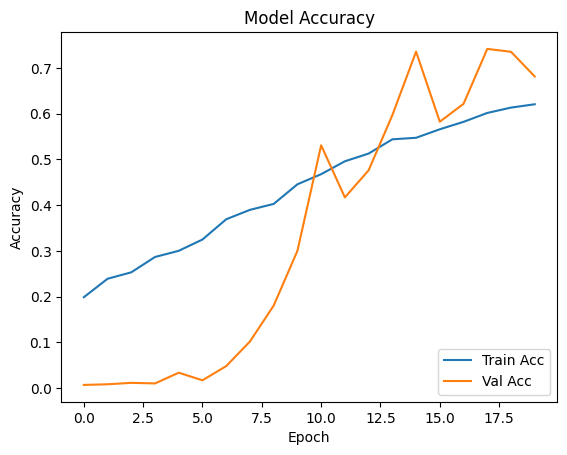

In [28]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

There are still critical issues with the training model.
The model's graph seems to be that the model is not able to predict from the validation loss.
So we again train the model and here we reduce the image size

In [18]:
IMG_SIZE =  224

In [88]:
model = Sequential()

In [37]:
#Input Layer
model.add(Input(shape=(IMG_SIZE, IMG_SIZE, 3))) 
#Convolution Layer And Max Pooling Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
#adding a Global average pooling
model.add(GlobalAveragePooling2D())
#Adding the dense hidden layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))


In [38]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
# Fitting the model with validation data
history_2 = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20
)

Epoch 1/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 91s 137ms/step - accuracy: 0.1734 - loss: 4.9820 - val_accuracy: 0.0382 - val_loss: 2.3724
Epoch 2/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 134ms/step - accuracy: 0.2347 - loss: 2.1492 - val_accuracy: 0.0100 - val_loss: 2.7068
Epoch 3/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 88s 137ms/step - accuracy: 0.2720 - loss: 2.0665 - val_accuracy: 0.0310 - val_loss: 2.4573
Epoch 4/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 134ms/step - accuracy: 0.3201 - loss: 1.9646 - val_accuracy: 0.0379 - val_loss: 2.3880
Epoch 5/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 134ms/step - accuracy: 0.3430 - loss: 1.8885 - val_accuracy: 0.0304 - val_loss: 2.4923
Epoch 6/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 134ms/step - accuracy: 0.3825 - loss: 1.7892 - val_accuracy: 0.1923 - val_loss: 2.1098
Epoch 7/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 134ms/step - accuracy: 0.4173 - loss: 1.7171 - val_accuracy: 0.3935 - val_loss: 1.8561
Epoch 8/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 134ms/step - accuracy: 0.4374 - loss: 1

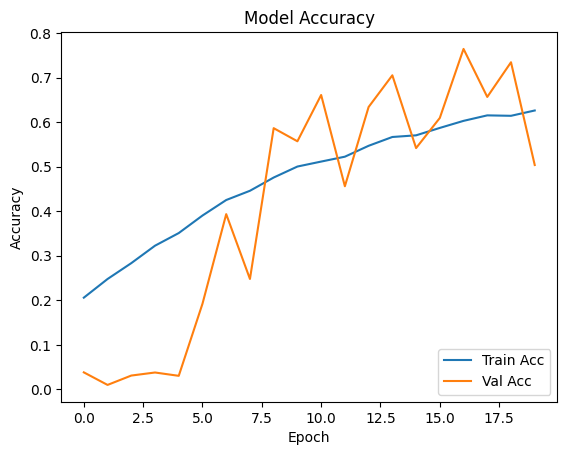

In [41]:
# Plot training and validation accuracy
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

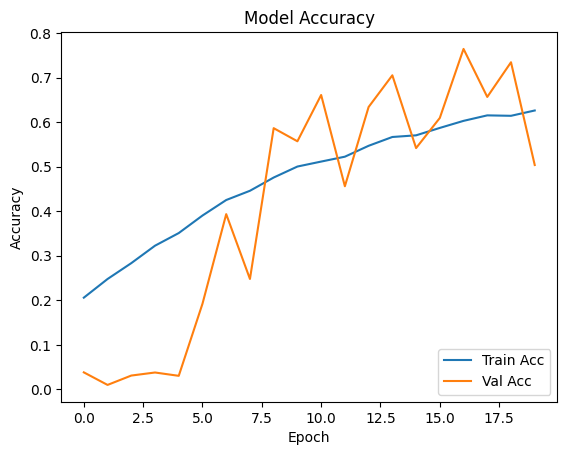

In [81]:
# Plot training and validation accuracy
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Now the problem which can be noted from the graph is in the validation set :

The validation set may be varying with huge amount 

One good thing from the above training model is that the training curve is having a straight curve path instead of having steeps over anf over like the validation set

##Hence it is better to create a validation set from the training data itself and checking for loss.

In [22]:
import splitfolders

In [23]:


# This will create output/train, output/val, and output/test folders with the same class subfolders
splitfolders.ratio(
    '/kaggle/input/insplad/Train_data/train',          # Input folder with class subfolders
    output="Training_split",    # Output folder to save split data
    seed=1337,          # Reproducible splits
    ratio=(.8, .1, .1)  # 80% train, 10% val, 10% test
)


Copying files: 5108 files [00:09, 519.22 files/s]


In [24]:
#LOADING THE VALIDATION DATA
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/Training_split/train",           # Path to your train folder
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=1337
)

Found 4084 files belonging to 11 classes.


In [25]:
#LOADING THE VALLIDATION DATA
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/Training_split/val",           # Path to your train folder
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 508 files belonging to 11 classes.


In [26]:
# Load test data
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/Training_split/test",            # Path to your test folder
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 516 files belonging to 11 classes.


In [27]:


model = Sequential()

In [28]:
IMG_SIZE

224

In [74]:
#Input Layer
model.add(Input(shape=(IMG_SIZE, IMG_SIZE, 3))) 
#Convolution Layer And Max Pooling Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
#adding a Global average pooling
model.add(GlobalAveragePooling2D())
#Adding the dense hidden layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))

In [78]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [79]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,179 (434.29 KB)

 Trainable params: 111,179 (434.29 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Fitting the model with validation data
history_3 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.1691 - loss: 7.0655 - val_accuracy: 0.2913 - val_loss: 2.0319
Epoch 2/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.2332 - loss: 2.1986 - val_accuracy: 0.3071 - val_loss: 1.9898
Epoch 3/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.2464 - loss: 2.1254 - val_accuracy: 0.3071 - val_loss: 1.9519
Epoch 4/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.2767 - loss: 2.0673 - val_accuracy: 0.3642 - val_loss: 1.8550
Epoch 5/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3041 - loss: 1.9793 - val_accuracy: 0.3878 - val_loss: 1.7877
Epoch 6/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3201 - loss: 1.9375 - val_accuracy: 0.3996 - val_loss: 1.6814
Epoch 7/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3504 - loss: 1.8407 - val_accuracy: 0.4744 - val_loss: 1.5507
Epoch 8/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3866 - loss: 1.7749 - val_acc

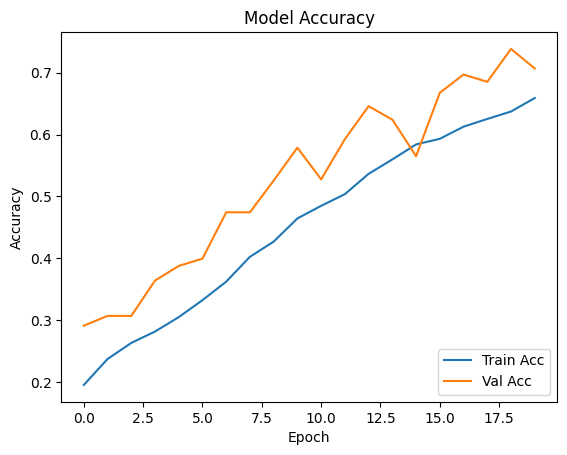

In [84]:
# Plot training and validation accuracy
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

So far the best model as we can see the training and the validation set are rising with less steeps as earlier


But this may be further increased by increasing the number of epochs and having an earlystopping call on that


In [36]:
model = keras.Sequential()

In [35]:
#to increase the models performance

#I will add a data augmentation for the layers

# also adding a regularizer to the model

from tensorflow.keras import regularizers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


In [38]:
model.add(data_augmentation)
#No need of Input Layer now 
#Convolution Layer And Max Pooling Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
#adding a Global average pooling
model.add(GlobalAveragePooling2D())
#Adding the dense hidden layer
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))


In [40]:
#adding an early stop callback on the model 
#so that the model can be trained on more epochs

from tensorflow.keras.callbacks import EarlyStopping

In [41]:

early_stopping_callback = EarlyStopping(
    monitor = 'val_loss',patience=3,verbose=1,
    mode='min',restore_best_weights=True
)

In [41]:
#compiling the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [42]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Fitting the model with validation data
history_3 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,callbacks=[early_stopping_callback]
)

Epoch 1/100


I0000 00:00:1748273836.452826     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


511/511 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.1358 - loss: 7.7426 - val_accuracy: 0.2677 - val_loss: 2.3628
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.2364 - loss: 2.2856 - val_accuracy: 0.2815 - val_loss: 2.3764
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.2550 - loss: 2.1986 - val_accuracy: 0.3228 - val_loss: 2.2076
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.2801 - loss: 2.1048 - val_accuracy: 0.2815 - val_loss: 2.4034
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3073 - loss: 2.0340 - val_accuracy: 0.3012 - val_loss: 2.3139
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.3343 - loss: 1.9540 - val_accuracy: 0.4469 - val_loss: 1.8422
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.3763 - loss: 1.8776 - val_accuracy: 0.4094 - val_loss: 2.0690
Epoch 8/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.4084 - loss: 1.7747 - val_ac

In [ ]:
# Plot training and validation accuracy
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

From the above graph we can conclude that:
i) for around 25-28 epochs the model is learning and also predicting from the validation set at around 70-75% accuracy 
ii) Early stopping stopped the model's training when the validation line siginficantly dropped and could result into overfitting further

In [26]:
#Let's try to increase the model's performance 
#i) by trying different values of Dropout , Regularization , and Learning rate 


In [30]:
#adding a learning rate scheduler
from tensorflow.keras.callbacks import LearningRateScheduler

In [31]:
def custom_scheduler(epoch,lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

In [32]:
lr_scheduler_callback = LearningRateScheduler(
    custom_scheduler , verbose=1
)

In [49]:
model = Sequential()

In [50]:
model.add(data_augmentation)
#No need of Input Layer now 
#Convolution Layer And Max Pooling Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
#adding a Global average pooling
model.add(GlobalAveragePooling2D())
#Adding the dense hidden layer
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))


In [51]:
#compiling the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [52]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,179 (434.29 KB)

 Trainable params: 111,179 (434.29 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Fitting the model with validation data
history_5 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,callbacks=[lr_scheduler_callback ,early_stopping_callback]
)


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.1331 - loss: 8.7359 - val_accuracy: 0.2579 - val_loss: 2.2171 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.1965 - loss: 2.3169 - val_accuracy: 0.2638 - val_loss: 2.1748 - learning_rate: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.2481 - loss: 2.1900 - val_accuracy: 0.2520 - val_loss: 2.4386 - learning_rate: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.2723 - loss: 2.1281 - val_accuracy: 0.2717 - val_loss: 2.2478 - learning_rate: 1.0000e-04

Epoch 5: LearningRateScheduler setting lear

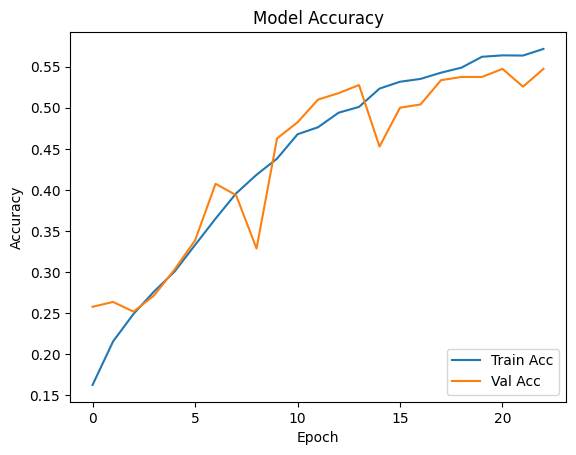

In [55]:
# Plot training and validation accuracy
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [59]:
model = Sequential()

In [60]:
model.add(data_augmentation)
#No need of Input Layer now 
#Convolution Layer And Max Pooling Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
#adding a Global average pooling
model.add(GlobalAveragePooling2D())
#Adding the dense hidden layer
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(11,activation='softmax'))

In [61]:
#compiling the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,179 (434.29 KB)

 Trainable params: 111,179 (434.29 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Fitting the model with validation data
history_5 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,callbacks=[lr_scheduler_callback ,early_stopping_callback]
)


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.1655 - loss: 5.7085 - val_accuracy: 0.2598 - val_loss: 2.2426 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.2646 - loss: 2.1513 - val_accuracy: 0.3366 - val_loss: 2.1280 - learning_rate: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3187 - loss: 1.9959 - val_accuracy: 0.4390 - val_loss: 1.9783 - learning_rate: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3926 - loss: 1.8410 - val_accuracy: 0.4744 - val_loss: 1.8085 - learning_rate: 1.0000e-04

Epoch 5: LearningRateScheduler setting lear

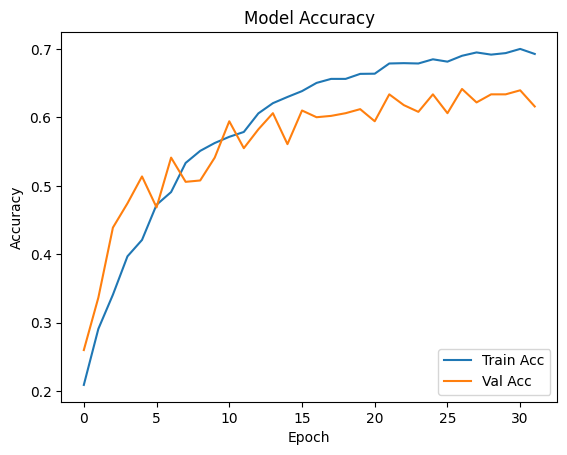

In [64]:
# Plot training and validation accuracy
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Changing the dropout to 0.3 instead decresed the model's performance so let's try out with 0.6 if it still doesn't work 0.5 would remain the best dropout

In [99]:
model = Sequential()

In [100]:
model.add(data_augmentation)
#No need of Input Layer now 
#Convolution Layer And Max Pooling Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
#adding a Global average pooling
model.add(GlobalAveragePooling2D())
#Adding the dense hidden layer
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.6))
model.add(Dense(11,activation='softmax'))

In [101]:
#compiling the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [102]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Fitting the model with validation data
history_6 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,callbacks=[lr_scheduler_callback ,early_stopping_callback]
)


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.1279 - loss: 7.6003 - val_accuracy: 0.1673 - val_loss: 2.3870 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.2064 - loss: 2.3139 - val_accuracy: 0.2106 - val_loss: 2.3242 - learning_rate: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.2440 - loss: 2.2152 - val_accuracy: 0.2264 - val_loss: 2.5490 - learning_rate: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.3023 - loss: 2.0968 - val_accuracy: 0.3110 - val_loss: 2.4578 - learning_rate: 1.0000e-04

Epoch 5: LearningRateScheduler setting lear

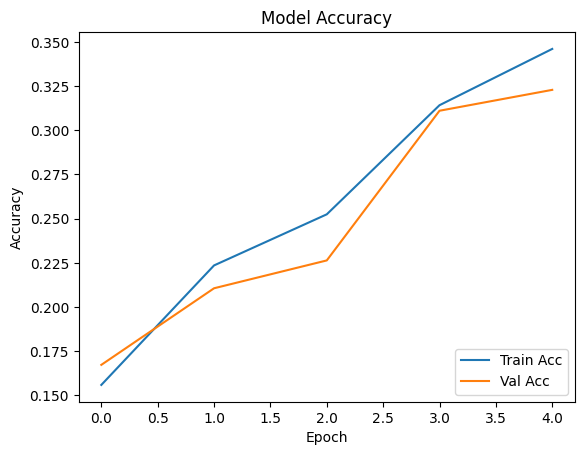

In [104]:
# Plot training and validation accuracy
plt.plot(history_6.history['accuracy'], label='Train Acc')
plt.plot(history_6.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Here the earlystopping call was called very early

Yet we can conclude 0.5 dropout was the best till now

In [33]:
model = Sequential()

In [36]:
model.add(data_augmentation)
#No need of Input Layer now 
#Convolution Layer And Max Pooling Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
#adding a Global average pooling
model.add(GlobalAveragePooling2D())
#Adding the dense hidden layer
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))

In [37]:
#compiling the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Fitting the model with validation data
history_7 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,callbacks=[lr_scheduler_callback ,early_stopping_callback]
)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.1502 - loss: 3.7426 - val_accuracy: 0.1654 - val_loss: 2.3767 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.2233 - loss: 2.2315 - val_accuracy: 0.3406 - val_loss: 2.1353 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.2730 - loss: 2.0804 - val_accuracy: 0.2874 - val_loss: 2.3183 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3463 - loss: 1.9072 - val_accuracy: 0.4508 - val_loss: 1.9080 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001

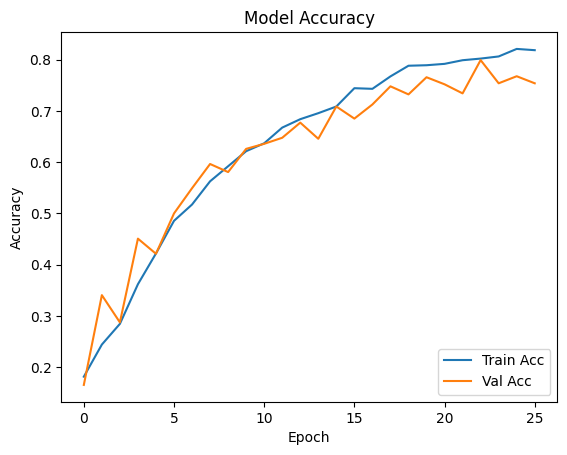

In [43]:
# Plot training and validation accuracy
plt.plot(history_7.history['accuracy'], label='Train Acc')
plt.plot(history_7.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

This model has achived the best performance yet
We can consider keeping it as the final model

In [44]:
#but before that this should be passed on to the test set as well


In [45]:
print("\nEvaluating on the test set...")
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)


Evaluating on the test set...
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8755 - loss: 0.4185


In [46]:
# Step 2: Print the results
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 83.72%
Test Loss: 0.5564


In [47]:
#Now we will again run the test set 
# To make sure the test was succesfull and the accuracy and loss is correct.

In [48]:
print("\nEvaluating on the test set...")
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)


Evaluating on the test set...
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8755 - loss: 0.4185


In [49]:
# Step 2: Print the results
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 83.72%
Test Loss: 0.5564


In [50]:
# We recieved the same test accuracy which mean the model is correctly having a good test accuracy.

In [51]:
#Here the project comes to an end. The model achieved is quite good not the best as futher improvements can be done.
# However to further improve the model we would likely need more data which is not provided in the insPLAd dataset.
